In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Part 1: Data Preprocessing**

## **Training Data**

In [17]:
google = pd.read_csv('/content/drive/MyDrive/Data Science/Stock Price Prediction/Google_Stock_Train (2010-2022).csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


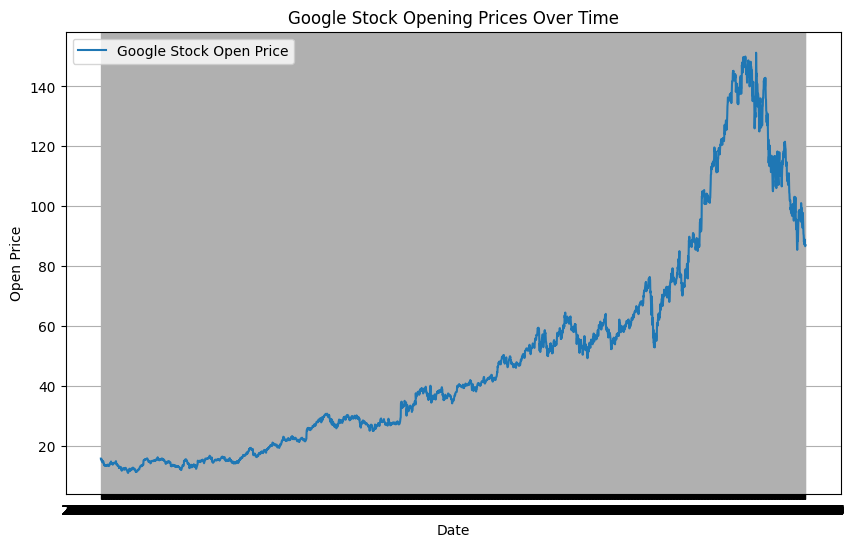

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(google['Date'], google['Open'], label='Google Stock Open Price')
plt.title('Google Stock Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.legend()
plt.show();

In [19]:
training_set = google.iloc[:, 1:2].values

In [20]:
training_set

array([[15.689439],
       [15.695195],
       [15.662162],
       ...,
       [86.980003],
       [86.620003],
       [86.980003]])

In [21]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
scaled_training_set = sc.fit_transform(training_set)

In [26]:
scaled_training_set

array([[0.03365182],
       [0.03369285],
       [0.03345737],
       ...,
       [0.54184909],
       [0.53928281],
       [0.54184909]])

In [22]:
len(scaled_training_set)

3272

In [24]:
# Creating a Data Structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(scaled_training_set)):
  X_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
X_train

array([[0.03365182, 0.03369285, 0.03345737, ..., 0.02264862, 0.02224367,
        0.02221334],
       [0.03369285, 0.03345737, 0.03052104, ..., 0.02224367, 0.02221334,
        0.02260937],
       [0.03345737, 0.03052104, 0.02741703, ..., 0.02221334, 0.02260937,
        0.02373324],
       ...,
       [0.61156615, 0.63779916, 0.63345075, ..., 0.55026077, 0.54277578,
        0.55482302],
       [0.63779916, 0.63345075, 0.63950999, ..., 0.54277578, 0.55482302,
        0.54184909],
       [0.63345075, 0.63950999, 0.63359329, ..., 0.55482302, 0.54184909,
        0.53928281]])

In [27]:
X_train.shape[0], X_train.shape[1]

(3212, 60)

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [29]:
X_train

array([[[0.03365182],
        [0.03369285],
        [0.03345737],
        ...,
        [0.02264862],
        [0.02224367],
        [0.02221334]],

       [[0.03369285],
        [0.03345737],
        [0.03052104],
        ...,
        [0.02224367],
        [0.02221334],
        [0.02260937]],

       [[0.03345737],
        [0.03052104],
        [0.02741703],
        ...,
        [0.02221334],
        [0.02260937],
        [0.02373324]],

       ...,

       [[0.61156615],
        [0.63779916],
        [0.63345075],
        ...,
        [0.55026077],
        [0.54277578],
        [0.55482302]],

       [[0.63779916],
        [0.63345075],
        [0.63950999],
        ...,
        [0.54277578],
        [0.55482302],
        [0.54184909]],

       [[0.63345075],
        [0.63950999],
        [0.63359329],
        ...,
        [0.55482302],
        [0.54184909],
        [0.53928281]]])

## **Test Data**

In [11]:
test_google = pd.read_csv('/content/drive/MyDrive/Data Science/Stock Price Prediction/Google_Stock_Test (2023).csv')
test_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [43]:
real_stock_price = test_google.iloc[:, 1:2].values

# **Part 2: Building the RNN**

In [33]:
!pip install keras

In [34]:
# Importing the Libraries and Packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input

In [32]:
# Initializing the RNN
regressor = Sequential()

In [35]:
# Adding Layers
regressor.add(Input(shape=(X_train.shape[1], 1)))

In [36]:
regressor.add(LSTM(units=128, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=32))
regressor.add(Dropout(rate=0.2))

In [37]:
regressor.add(Dense(units=1))

In [39]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,441 (630.63 KB)

 Trainable params: 161,441 (630.63 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
history = regressor.fit(X_train, y_train, epochs= 100, batch_size=32)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - loss: 9.0669e-04
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - loss: 9.6606e-04
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - loss: 8.4322e-04
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - loss: 9.2441e-04
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - loss: 9.5685e-04
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - loss: 9.7906e-04
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - loss: 9.5264e-04
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - loss: 0.0010
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - loss: 8.7073e-04
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - loss: 8.4026e-04
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - loss: 9.2035e-04
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - loss: 9.5839e-04
Epoch 13/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - loss: 9.4817e-04
Epoch 14/100
101/101 ━━━━

# **Part 3: Making the Predictions and visualizing the results**

In [44]:
dataset_total = pd.concat((google['Open'], test_google['Open']), axis= 0)
inputs = dataset_total[len(dataset_total) - len(test_google) - 60:].values

In [47]:
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [54]:
X_test = []
for i in range(60, len(inputs)):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [55]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [56]:
predicted_stock_price = regressor.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [57]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[ 90.95846 ],
       [ 92.3364  ],
       [ 93.84509 ],
       [ 92.897446],
       [ 91.33711 ],
       [ 91.30955 ],
       [ 90.67734 ],
       [ 91.71285 ],
       [ 93.98508 ],
       [ 94.923355],
       [ 95.49695 ],
       [ 95.77514 ],
       [ 95.14635 ],
       [ 96.907486],
       [100.0744  ],
       [101.7866  ],
       [100.75778 ],
       [100.172264],
       [100.64933 ],
       [101.32043 ],
       [101.30713 ],
       [102.065636],
       [106.51843 ],
       [107.83341 ],
       [107.26222 ],
       [107.166664],
       [106.82282 ],
       [105.585304],
       [102.5162  ],
       [100.19715 ],
       [ 99.23435 ],
       [ 99.19559 ],
       [ 99.78266 ],
       [ 99.852715],
       [ 98.71519 ],
       [ 97.18427 ],
       [ 96.49026 ],
       [ 95.16645 ],
       [ 94.44498 ],
       [ 93.99251 ],
       [ 94.11506 ],
       [ 94.12046 ],
       [ 95.47873 ],
       [ 97.3105  ],
       [ 98.66112 ],
       [ 98.616165],
       [ 98.19936 ],
       [ 97.0

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [59]:
r2_score(real_stock_price, predicted_stock_price)

0.8551410563100987

In [60]:
mean_absolute_error(real_stock_price, predicted_stock_price)

4.35349384267783

In [61]:
mean_squared_error(real_stock_price, predicted_stock_price)

23.217662458253603

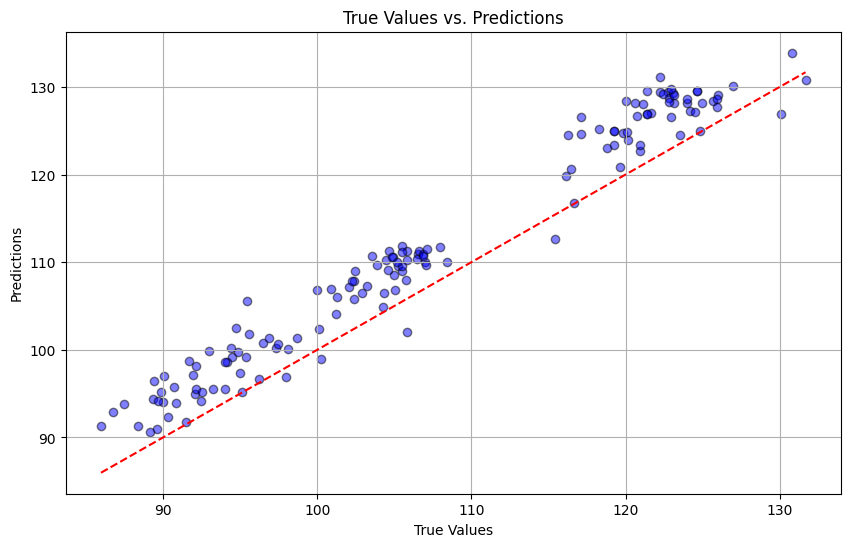

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(real_stock_price, predicted_stock_price, alpha=0.5, color='blue', edgecolor='k')
plt.plot([min(real_stock_price), max(real_stock_price)], [min(real_stock_price), max(real_stock_price)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.grid(True)
plt.show();

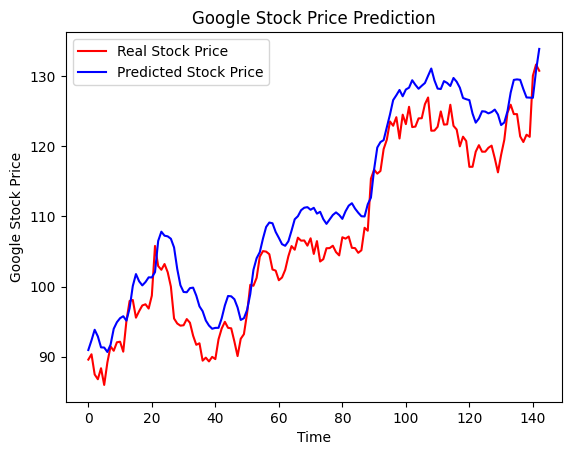

In [63]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show();

In [65]:
regressor.save('/content/drive/MyDrive/Data Science/Stock Price Prediction/Google-Stock-Price-Prediction.keras')